## import modules

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load Data

In [38]:
df_train=pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train
df_test

,ID,title,text,subject,date,class
0,0.0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,5-Aug-16,0.0
1,1.0,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,4-Feb-16,0.0
2,2.0,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,13-Jul-17,0.0
3,3.0,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,2-Mar-16,0.0
4,4.0,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,13-Aug-16,0.0
...,...,...,...,...,...,...
44914,NaN,NaN,NaN,NaN,NaN,NaN
44915,NaN,NaN,NaN,NaN,NaN,NaN
44916,NaN,NaN,NaN,NaN,NaN,NaN
44917,NaN,NaN,NaN,NaN,NaN,NaN


## check null values

In [39]:
df_train.isnull().sum()

ID         4513
title      4492
text       4492
subject    4505
date       4505
class      4505
dtype: int64

## check number of column & row

In [40]:
df_train.shape

(44919, 6)

## As the title, subject and date column will not going to be helpful in identification of the news

In [41]:
df_train = df_train.drop(["title", "subject","date"], axis = 1)

C:\Users\moham\AppData\Local\Temp\ipykernel_22972\2806416513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['class'],kde=False)


<Axes: xlabel='class'>

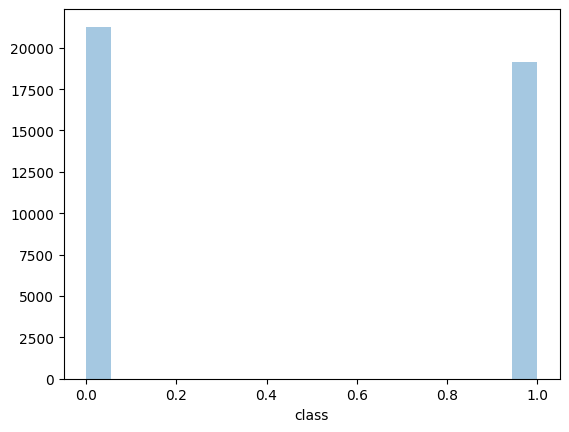

In [42]:
sns.distplot(df_train['class'],kde=False)

In [43]:
df_train

,ID,text,class
0,0.0,What will the world be like post-Donald Trump?...,0.0
1,1.0,The police shooting of black teen Michael Brow...,0.0
2,2.0,The six months since President Donald Trump wa...,0.0
3,3.0,"Last Friday, New Jersey Governor Chris Christi...",0.0
4,4.0,"The incredibly talented voice actor, Billy Wes...",0.0
...,...,...,...
44914,NaN,NaN,NaN
44915,NaN,NaN,NaN
44916,NaN,NaN,NaN
44917,NaN,NaN,NaN


In [44]:
df_train.isnull().sum()


ID       4513
text     4492
class    4505
dtype: int64

## Now we have to shuffle the dataset to prevent the model to get bias.

In [45]:
df=df_train.sample(frac=1)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,ID,text,class
0,19985.0,CLEVELAND (Reuters) - A handful of donors to t...,1.0
1,16896.0,"VIC/CERDANYOLA DEL VALLES, Spain (Reuters) - C...",1.0
2,NaN,NaN,NaN
3,36066.0,SYDNEY (Reuters) - The 11 countries committed ...,1.0
4,38666.0,Trump talked about a country on the brink of d...,0.0
...,...,...,...
44914,15380.0,"Charles Woods, father of U.S. Navy SEAL Tyrone...",0.0
44915,18795.0,BOGOTA (Reuters) - Former Marxist FARC rebels ...,1.0
44916,13047.0,PEOPLE IN GLASS HOUSES ALERT: TRUMP USED LEGAL...,0.0
44917,9266.0,Oops! As much as Clinton likes to spin this e-...,0.0


## Now Let’s explore the unique values in the each category using below code.

<Axes: xlabel='class', ylabel='count'>

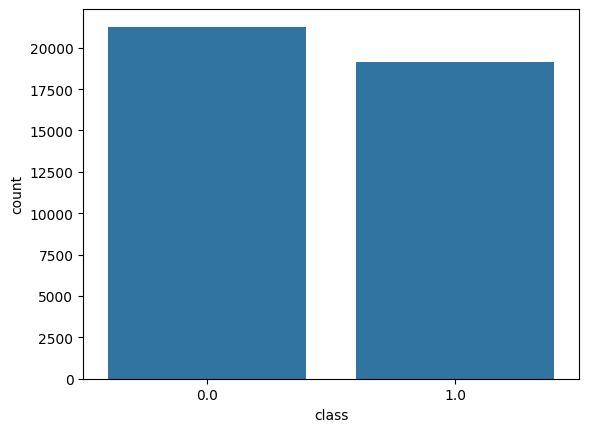

In [46]:
sns.countplot(data=df_train, 
			x='class', 
			order=df_train['class'].value_counts().index)


## drop null values

In [47]:
df_train = df_train.dropna()


## drop duplicates values

In [48]:
df_train.drop_duplicates(inplace=True)
df_train

C:\Users\moham\AppData\Local\Temp\ipykernel_22972\3410059971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop_duplicates(inplace=True)


,ID,text,class
0,0.0,What will the world be like post-Donald Trump?...,0.0
1,1.0,The police shooting of black teen Michael Brow...,0.0
2,2.0,The six months since President Donald Trump wa...,0.0
3,3.0,"Last Friday, New Jersey Governor Chris Christi...",0.0
4,4.0,"The incredibly talented voice actor, Billy Wes...",0.0
...,...,...,...
40422,40401.0,NEW YORK (Reuters) - A U.S. judge will hear ar...,1.0
40423,40402.0,WASHINGTON (Reuters) - A U.S. District Court j...,1.0
40424,40403.0,NEW YORK (Reuters) - A U.S. judge said he will...,1.0
40425,40404.0,SAN DIEGO (Reuters) - U.S. District Judge Gonz...,1.0


In [49]:
df_train.isnull().sum()

ID       0
text     0
class    0
dtype: int64

In [50]:
df_train.shape

(40393, 3)

C:\Users\moham\AppData\Local\Temp\ipykernel_22972\2806416513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['class'],kde=False)


<Axes: xlabel='class'>

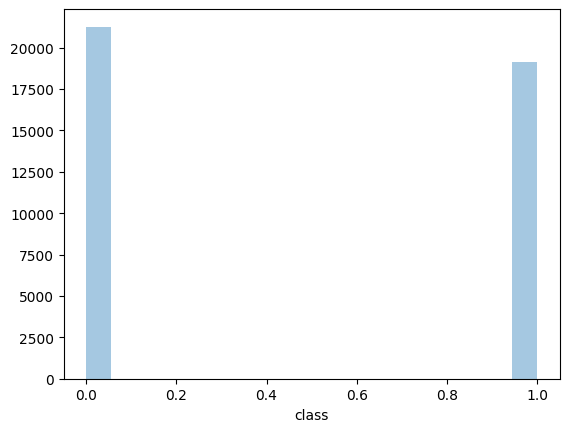

In [51]:
sns.distplot(df_train['class'],kde=False)

## Preprocessing and analysis

In [52]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Firstly we will remove all the stopwords, punctuations and any irrelevant spaces from the text

In [53]:
def preprocess_text(text_data): 
	preprocessed_text = [] 
	
	for sentence in tqdm(text_data): 
		sentence = re.sub(r'[^\w\s]', '', sentence) 
		preprocessed_text.append(' '.join(token.lower() 
								for token in str(sentence).split() 
								if token not in stopwords.words('english'))) 

	return preprocessed_text


## implement the function in all the news in the text column

In [54]:
preprocessed_review = preprocess_text(df_train['text'].values) 
df_train['text'] = preprocessed_review

100%|██████████| 40393/40393 [25:58<00:00, 25.93it/s]  
C:\Users\moham\AppData\Local\Temp\ipykernel_22972\3787618613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'] = preprocessed_review


In [55]:
preprocessed_review = preprocess_text(df_test['text'].values) 
df_test['text'] = preprocessed_review

100%|██████████| 4496/4496 [02:33<00:00, 29.23it/s]


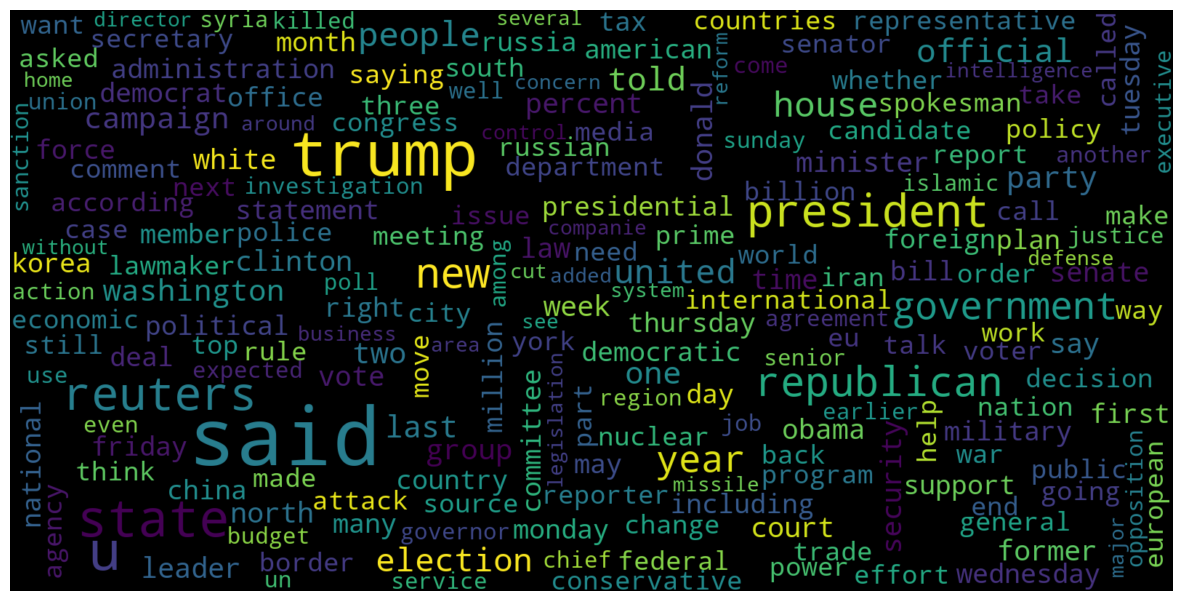

In [56]:
# Real 
consolidated = ' '.join( 
	word for word in df_train['text'][df_train['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


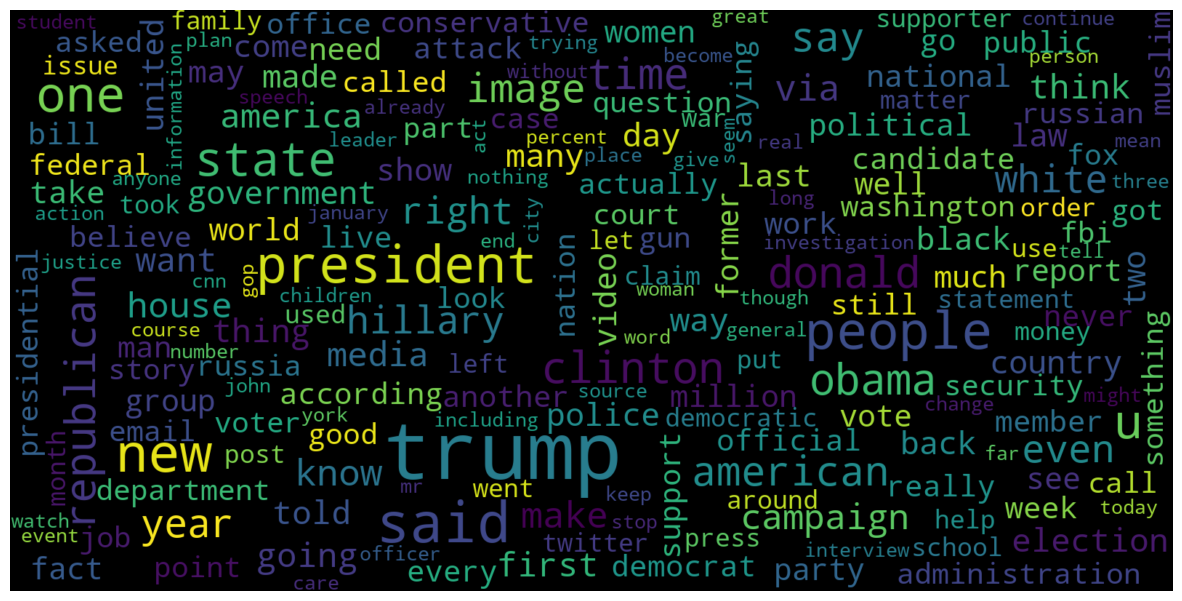

In [57]:
# Fake 
consolidated = ' '.join( 
	word for word in df_train['text'][df_train['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

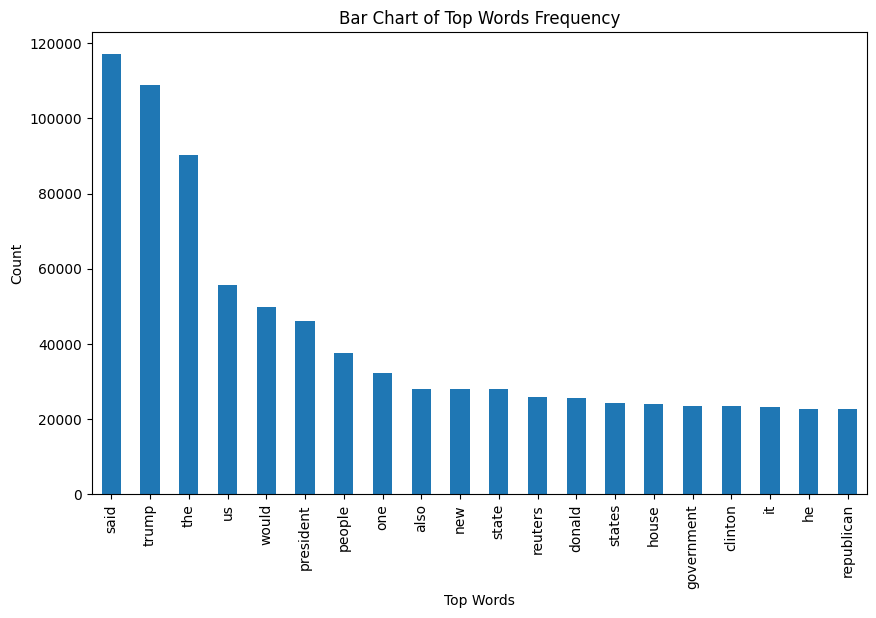

In [58]:
from sklearn.feature_extraction.text import CountVectorizer 


def get_top_n_words(corpus, n=None): 
	vec = CountVectorizer().fit(corpus) 
	bag_of_words = vec.transform(corpus) 
	sum_words = bag_of_words.sum(axis=0) 
	words_freq = [(word, sum_words[0, idx]) 
				for word, idx in vec.vocabulary_.items()] 
	words_freq = sorted(words_freq, key=lambda x: x[1], 
						reverse=True) 
	return words_freq[:n] 


common_words = get_top_n_words(df_train['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
	kind='bar', 
	figsize=(10, 6), 
	xlabel="Top Words", 
	ylabel="Count", 
	title="Bar Chart of Top Words Frequency"
) 


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

df_train['clean_text']= [' '.join(i) for i in df_train['text']]
df_test['clean_text']= [' '.join(i) for i in df_test['text']]
x_train, x_test, y_train, y_test = train_test_split(df_train['text'],
                                                    df_train['class'],test_size=0.25)

C:\Users\moham\AppData\Local\Temp\ipykernel_22972\162798679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['clean_text']= [' '.join(i) for i in df_train['text']]


## Converting text into Vectors

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(max_features=1000, ngram_range=(1,3))
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)
test_features = vectorization.transform(df_test['text'])

## Model training, Evaluation, and Prediction


In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9903611276160296
0.9909892068521636


In [62]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

1.0
0.9963362709179127


In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

1.0
0.997524507376968


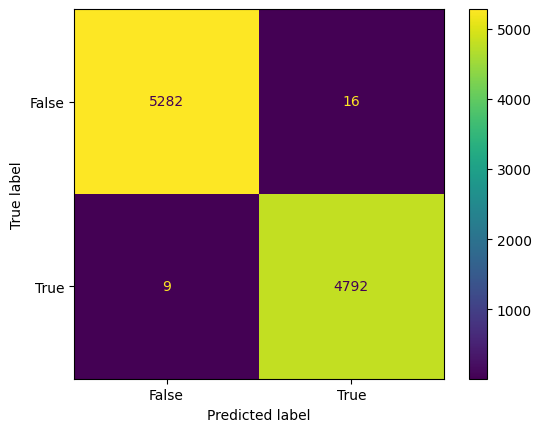

In [64]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()


In [65]:
df_test['TARGET']= model.predict(test_features)
df_test[['ID','TARGET']].to_csv('submission.csv',index=False)

## Conclusion
### Decision Tree Classifier and RandomForestClassifier are performing well.